### Environment and Python Version

This project was developed and executed using **Python 3.10.11**.

All code and dependencies have been tested to work smoothly in this environment to ensure reproducibility and stability of results.

If you plan to run this project on a different Python version, please verify that all required packages are compatible and consider using a virtual environment or containerization to avoid conflicts.

**Author : Evan Denis**

# Step 1: Extracting Text from PDF Documents

The first step in our text mining pipeline is to load the documents and extract the raw text from the PDF files.  
We have 11 PDF files categorized into three themes: EEG, motors, and Natural Language Processing (NLP).  
Extracting clean text is crucial because it will be the input for all subsequent text processing and topic modeling.

For this purpose, we use the `PyPDF2` library, which can read PDF files and extract text page by page.  
The goal is to create a list of tuples, each containing the filename and the extracted text from that document.

This step will also help us confirm that the documents are properly loaded and ready for preprocessing.

In [2]:
import PyPDF2
import os

def extract_text_from_pdf(path):
    """
    Extracts text from all PDF files in the given directory.

    Args:
        path (str): Directory containing PDF files.

    Returns:
        List of tuples: (filename, extracted_text)
    """
    texts = []
    for filename in os.listdir(path):
        if filename.endswith('.pdf'):
            file_path = os.path.join(path, filename)
            with open(file_path, 'rb') as file:
                reader = PyPDF2.PdfReader(file)
                text = ""
                for page in reader.pages:
                    text += page.extract_text() or ""
                texts.append((filename, text))
    return texts

# Change this to the folder path containing your PDFs
documents = extract_text_from_pdf('Docs_para_classif')

print(f"Number of documents loaded: {len(documents)}")
print(f"Sample text from first document ({documents[0][0]}):\n")
print(documents[0][1][:500])  # Print first 500 characters of first document


Number of documents loaded: 11
Sample text from first document (EEG01.pdf):

Contents lists available at ScienceDirect
Journal of Neuroscience Methods
journal homepage: www.elsevier.com/locate/jneumeth
Invited review
Clinical implication of high-density EEG sleep recordings in Parkinson ’s
disease
Ninfa Amatoa, Serena Caverzasioa,b, Salvatore Galatia,b,*
aParkinson's Disease and Movement Disorders Center, Neurocenter of Southern Switzerland - Institute of Clinical Neuroscience of Southern Switzerland, Lugano,
Switzerland
bFaculty of Biomedical Sciences, University of Sou


### Analysis of Extracted Text

- **Number of documents loaded:** 11, which matches the expected number of PDFs, indicating that all files were correctly read.
- **Content type:** The sample text appears to be from scientific study articles, with structured sections like "Contents lists," journal information, author affiliations, and technical terminology. This suggests formal academic writing.
- **Text completeness:** The extracted snippet looks coherent and complete for the first few hundred characters, which is a good sign that the PDF extraction worked well.
- **Potential issues:**  
   - There might be some artifacts typical of PDF-to-text conversion, such as special characters or unusual line breaks (e.g., "Parkinson ’s" has a space before the apostrophe).
   - Scientific texts often include formulas, figures, tables, or multi-column layouts that might be lost or jumbled in extraction.
- **Implications for preprocessing:**  
   - We'll need to carefully clean special characters and normalize text.
   - Removing or handling common academic terms or section headers might help improve topic clarity.
- **Next steps:**  
   - Proceed to text preprocessing focusing on cleaning and tokenization.
   - Consider whether lemmatization or stemming is needed to handle scientific vocabulary.

# Step 2: Text Preprocessing

Now that the raw text has been extracted from the PDF files, we need to clean and normalize it.  
Preprocessing helps reduce noise and improve the quality of input for topic modeling.

Typical preprocessing steps include:
- **Lowercasing** all text to ensure consistent token matching.
- **Removing punctuation**, numbers, and special characters that are not meaningful for topic extraction.
- **Tokenizing** the text into words (splitting on spaces).
- **Removing stopwords**, i.e., common words like "the", "and", "de", "el" that carry little semantic meaning.
- Optionally, **removing short tokens** (e.g., fewer than 3 characters).
- Optionally, applying **lemmatization or stemming** (not included in this version).

We'll use NLTK's English stopword list.

The output of this step will be a list of tokens (cleaned words) for each document.

In [4]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Choose stopwords language: 'spanish' or 'english'
stop_words = set(stopwords.words('english'))  # replace with 'spanish' if your texts are in Spanish

def preprocess(text):
    """
    Cleans and tokenizes the input text.
    
    Args:
        text (str): Raw text from the document.
        
    Returns:
        List[str]: List of cleaned tokens.
    """
    # Lowercase
    text = text.lower()
    # Remove numbers and punctuation
    text = re.sub(r'[^a-záéíóúñü\s]', ' ', text)
    # Tokenize (split into words)
    tokens = text.split()
    # Remove stopwords and short tokens
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]
    return tokens

# Apply preprocessing to all documents
processed_docs = [(fname, preprocess(text)) for fname, text in documents]

# Show sample of the result
print(f"Sample tokens from {processed_docs[0][0]}:\n")
print(processed_docs[0][1][:30])  # Show first 30 tokens of first doc


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


Sample tokens from EEG01.pdf:

['contents', 'lists', 'available', 'sciencedirect', 'journal', 'neuroscience', 'methods', 'journal', 'homepage', 'www', 'elsevier', 'com', 'locate', 'jneumeth', 'invited', 'review', 'clinical', 'implication', 'high', 'density', 'eeg', 'sleep', 'recordings', 'parkinson', 'disease', 'ninfa', 'amatoa', 'serena', 'caverzasioa', 'salvatore']


## Step 2.2 (V1 & V2): Advanced Preprocessing — Lemmatization and Bigrams

In this step, we implement two additional preprocessing strategies to compare against the basic one:

### Variant 1: Lemmatization
We use the `spaCy` library with a Spanish or English language model.

### Variant 2: Bigrams and Trigrams
Using `gensim.Phrases`, we detect frequent co-occurring terms and merge them into single tokens like `natural_language`.

In [ ]:
# Load spaCy English model (run once in your environment)
# !python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.8 MB 2.1 MB/s eta 0:00:06
     --------- ------------------------------ 3.1/12.8 MB 7.4 MB/s eta 0:00:02
     ----------------- ---------------------- 5.5/12.8 MB 12.0 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 15.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import spacy
from gensim.models.phrases import Phrases, Phraser

nlp = spacy.load("en_core_web_sm")

def preprocess_v1_lemmatize(text):
    """
    Clean and lemmatize text using spaCy.
    """
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop and len(token) > 2]
    return tokens

# Apply V1 to all documents
lemmatized_docs = [(fname, preprocess_v1_lemmatize(text)) for fname, text in documents]

# Build bigram and trigram models from lemmatized tokens
token_lists = [tokens for _, tokens in lemmatized_docs]
bigram = Phrases(token_lists, min_count=2, threshold=5)
bigram_mod = Phraser(bigram)
trigram = Phrases(bigram[token_lists], threshold=5)
trigram_mod = Phraser(trigram)

def preprocess_v2_bigrams(tokens):
    """
    Apply bigram and trigram models to token list.
    """
    return trigram_mod[bigram_mod[tokens]]

# Apply V2 to lemmatized documents
bigram_docs = [(fname, preprocess_v2_bigrams(tokens)) for fname, tokens in lemmatized_docs]

# Show samples
print(f"Sample (V1 - Lemmatized) from {lemmatized_docs[0][0]}:\n")
print(lemmatized_docs[0][1][:30])

print(f"\nSample (V2 - Bigrams) from {bigram_docs[0][0]}:\n")
print(bigram_docs[0][1][:30])


Sample (V1 - Lemmatized) from EEG01.pdf:

['content', 'list', 'available', 'sciencedirect', 'journal', 'neuroscience', 'method', 'journal', 'homepage', 'invite', 'review', 'clinical', 'implication', 'high', 'density', 'eeg', 'sleep', 'recording', 'parkinson', 'disease', 'ninfa', 'amatoa', 'serena', 'caverzasioa', 'salvatore', 'galatia', 'aparkinson', 'disease', 'movement', 'disorder']

Sample (V2 - Bigrams) from EEG01.pdf:

['content_list_available_sciencedirect', 'journal_neuroscience', 'method', 'journal_homepage', 'invite', 'review', 'clinical', 'implication', 'high_density', 'eeg', 'sleep', 'recording', 'parkinson_disease', 'ninfa', 'amatoa', 'serena', 'caverzasioa', 'salvatore', 'galatia', 'aparkinson', 'disease_movement', 'disorder', 'center', 'neurocenter', 'southern_switzerland', 'institute', 'clinical_neuroscience', 'southern_switzerland', 'lugano_switzerland', 'bfaculty']


## Step 2.3 — Analysis of Preprocessing Results (V1 vs V2)

We compare two preprocessing strategies applied to the document `EEG01.pdf`.


**Observations:**
- Bigram merging successfully captures multi-word scientific expressions such as `parkinson_disease`, `clinical_neuroscience`, `southern_switzerland`.
- However, it also merges irrelevant metadata (`content_list_available_sciencedirect`, `journal_homepage`), which could dominate early topic clusters.
- This version emphasizes document structure and institutional context more than core scientific content — useful if filtered properly.

## Conclusion
- **V1** is cleaner and more focused on single-word scientific terms.
- **V2** provides richer multi-word expressions, but introduces domain noise that should be pruned if used for modeling.

We will proceed to topic modeling with both V1 and V2 to compare how these preprocessing choices impact the quality and interpretability of topics.


# Step 3: Topic Modeling with LDA (Variants V1 and V2)

We now apply Latent Dirichlet Allocation (LDA), a generative probabilistic model that assigns topics to documents based on word distribution.

Each document is treated as a mixture of topics, and each topic is defined by a distribution over words.

### Key elements:
- **Dictionary**: Maps tokens to IDs
- **Corpus**: Bag-of-words representation for each document
- **Number of Topics (K)**: To be optimized using coherence scores
- **Evaluation**: We compare topic coherence and interpretability for preprocessing variants V1 and V2.

We use the `gensim` library, and test several values of `K` (e.g. 2 to 6) to find the optimal number of topics using the **c_v** coherence measure (semantic similarity between top topic words).

Coherence for k=2: 0.6418
Coherence for k=3: 0.6393
Coherence for k=4: 0.6530
Coherence for k=5: 0.5097
Coherence for k=6: 0.6308
Coherence for k=2: 0.4598
Coherence for k=3: 0.6557
Coherence for k=4: 0.6510
Coherence for k=5: 0.6579
Coherence for k=6: 0.6220


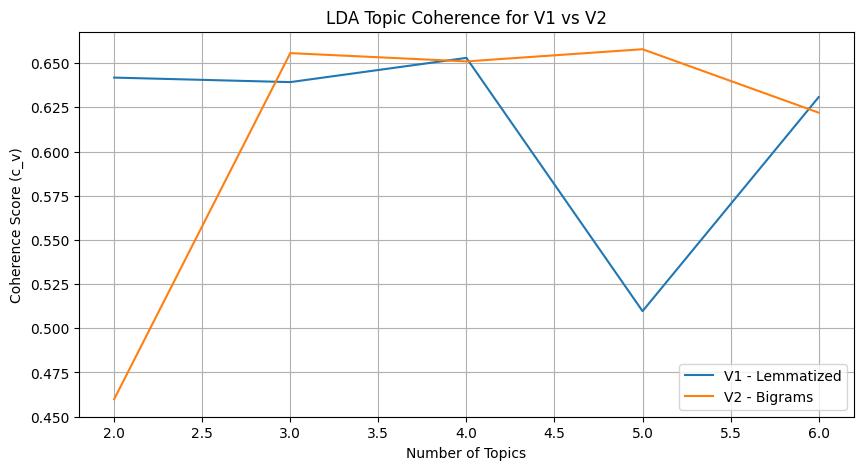


--- Best model V1 (k=4) topics ---
Topic 0: 0.031*"fuel" + 0.031*"diesel" + 0.025*"emission" + 0.024*"ppm" + 0.020*"oxide" + 0.020*"additive" + 0.020*"nano" + 0.020*"nanoparticle" + 0.016*"sleep" + 0.015*"biodiesel"
Topic 1: 0.027*"disease" + 0.021*"patient" + 0.020*"eeg" + 0.017*"alpha" + 0.014*"parkinson" + 0.012*"learning" + 0.011*"cognitive" + 0.009*"correlate" + 0.009*"severity" + 0.008*"correlation"
Topic 2: 0.062*"engine" + 0.053*"fuel" + 0.026*"combustion" + 0.025*"emission" + 0.022*"diesel" + 0.018*"oil" + 0.016*"gasoline" + 0.012*"fusel" + 0.011*"ignition" + 0.011*"energy"
Topic 3: 0.015*"step" + 0.014*"extraction" + 0.014*"business" + 0.013*"rule" + 0.012*"text" + 0.011*"language" + 0.011*"verb" + 0.010*"engineering" + 0.010*"paragraph" + 0.010*"action"

--- Best model V2 (k=5) topics ---
Topic 0: 0.023*"patient" + 0.016*"parkinson_disease" + 0.012*"eeg" + 0.008*"disease" + 0.007*"network" + 0.006*"clinical" + 0.006*"motor" + 0.006*"symptom" + 0.005*"alteration" + 0.005*"me

In [16]:
from gensim import corpora
from gensim.models import LdaModel, CoherenceModel
import matplotlib.pyplot as plt

# Utility function
def prepare_corpus(tokenized_docs):
    texts = [tokens for _, tokens in tokenized_docs]
    dictionary = corpora.Dictionary(texts)
    dictionary.filter_extremes(no_below=2, no_above=0.6)
    corpus = [dictionary.doc2bow(text) for text in texts]
    return corpus, dictionary

# Utility to train LDA and compute coherence
def compute_coherence(dictionary, corpus, texts, k_range):
    models = []
    coherences = []
    for k in k_range:
        lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, random_state=42, passes=10)
        cm = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence = cm.get_coherence()
        models.append(lda)
        coherences.append(coherence)
        print(f"Coherence for k={k}: {coherence:.4f}")
    return models, coherences

# Prepare data for V1 and V2
corpus_v1, dict_v1 = prepare_corpus(lemmatized_docs)
corpus_v2, dict_v2 = prepare_corpus(bigram_docs)

# Range of topics to test
k_range = range(2, 7)

# V1: LDA and coherence
models_v1, coherence_v1 = compute_coherence(dict_v1, corpus_v1, [t for _, t in lemmatized_docs], k_range)

# V2: LDA and coherence
models_v2, coherence_v2 = compute_coherence(dict_v2, corpus_v2, [t for _, t in bigram_docs], k_range)

# Plot comparison
plt.figure(figsize=(10, 5))
plt.plot(k_range, coherence_v1, label='V1 - Lemmatized')
plt.plot(k_range, coherence_v2, label='V2 - Bigrams')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score (c_v)')
plt.title('LDA Topic Coherence for V1 vs V2')
plt.legend()
plt.grid(True)
plt.show()

# Optionally show top words from best model
best_k_v1 = k_range[coherence_v1.index(max(coherence_v1))]
best_model_v1 = models_v1[coherence_v1.index(max(coherence_v1))]

best_k_v2 = k_range[coherence_v2.index(max(coherence_v2))]
best_model_v2 = models_v2[coherence_v2.index(max(coherence_v2))]

print(f"\n--- Best model V1 (k={best_k_v1}) topics ---")
for i, topic in best_model_v1.show_topics(num_topics=best_k_v1, formatted=True):
    print(f"Topic {i}: {topic}")

print(f"\n--- Best model V2 (k={best_k_v2}) topics ---")
for i, topic in best_model_v2.show_topics(num_topics=best_k_v2, formatted=True):
    print(f"Topic {i}: {topic}")


## Topic Modeling Analysis

The coherence scores suggest that **V1 is more stable**, with a clear peak at **k=4**, while **V2 is slightly better at k=5** but more fragmented. In V2, EEG and NLP topics appear split across multiple clusters, indicating potential **over-segmentation**.

By contrast, **V1 captures the three expected domains (EEG, motors, PLN) more cleanly**, with only minor overlap (e.g., Topic 0 mixing sleep and fuel).

Overall, despite a marginally higher coherence in V2, the topics in V1 are **semantically more coherent and interpretable**, aligning better with the actual document groups. This supports the idea that **3 main topics are optimal**, possibly merged from 4 in V1.

For the next steps, we will prefer to select **3 clusters**, as this choice aligns with the known thematic structure of the documents (EEG, motors, and NLP). Selecting three topics simplifies interpretation by reducing topic fragmentation and better grouping related documents. Although some models with more clusters showed slightly higher coherence scores, they tended to split closely related topics, which may complicate the analysis without adding meaningful distinction.

# Step 4 – Final Topic Modeling with k=3 for V1 and V2

Based on the coherence analysis, we select **k=3** topics for both versions: V1 (lemmatized tokens) and V2 (bigrams).

We will train two final LDA models (one per preprocessing), extract the top terms per topic, and assign documents to their dominant topic. This will allow a direct comparison of the clustering quality between V1 and V2.

In [19]:
# Number of topics chosen
final_k = 3

# Train final LDA models with k=3
final_lda_v1 = LdaModel(corpus=corpus_v1, id2word=dict_v1, num_topics=final_k, random_state=42, passes=15)
final_lda_v2 = LdaModel(corpus=corpus_v2, id2word=dict_v2, num_topics=final_k, random_state=42, passes=15)

# Show top words per topic for V1
print(f"\n--- Final model V1 (k={final_k}) topics ---")
for i, topic in final_lda_v1.show_topics(num_topics=final_k, num_words=10, formatted=False):
    print(f"Topic {i}: ", ", ".join([word for word, _ in topic]))

# Show top words per topic for V2
print(f"\n--- Final model V2 (k={final_k}) topics ---")
for i, topic in final_lda_v2.show_topics(num_topics=final_k, num_words=10, formatted=False):
    print(f"Topic {i}: ", ", ".join([word for word, _ in topic]))

# Assign dominant topic to each document for V1
doc_topics_v1 = []
for bow in corpus_v1:
    topic_probs = final_lda_v1.get_document_topics(bow)
    dominant_topic = max(topic_probs, key=lambda x: x[1])[0]
    doc_topics_v1.append(dominant_topic)

# Assign dominant topic to each document for V2
doc_topics_v2 = []
for bow in corpus_v2:
    topic_probs = final_lda_v2.get_document_topics(bow)
    dominant_topic = max(topic_probs, key=lambda x: x[1])[0]
    doc_topics_v2.append(dominant_topic)

# Create dataframe summarizing assignments
import pandas as pd

df_assignment = pd.DataFrame({
    'Document': [f'Doc_{i+1}' for i in range(len(lemmatized_docs))],
    'V1_Dominant_Topic': doc_topics_v1,
    'V2_Dominant_Topic': doc_topics_v2,
    'Original_Label': [label for label, _ in lemmatized_docs]  # assuming labels exist in first element
})

print(df_assignment)


--- Final model V1 (k=3) topics ---
Topic 0:  disease, patient, eeg, sleep, parkinson, motor, testing, class, brain, software
Topic 1:  extraction, business, language, rule, step, verb, text, natural, learning, action
Topic 2:  fuel, engine, diesel, emission, combustion, oil, ppm, additive, oxide, blend

--- Final model V2 (k=3) topics ---
Topic 0:  patient, parkinson_disease, eeg, disease, network, clinical, correlation, brain, symptom, correlate
Topic 1:  text, step, word, algorithm, example, natural_language, paragraph, utilize, learning, technology
Topic 2:  fuel, engine, emission, diesel, nanoparticle, combustion, diesel_engine, fusel_oil, gasoline, ppm
   Document  V1_Dominant_Topic  V2_Dominant_Topic Original_Label
0     Doc_1                  0                  0      EEG01.pdf
1     Doc_2                  0                  0      EEG02.pdf
2     Doc_3                  0                  0      EEG03.pdf
3     Doc_4                  0                  0      EEG04.pdf
4     D

### Final LDA Models (k=3) Summary

Both models clearly separate the three main themes: EEG (Topic 0), NLP (Topic 1), and motors (Topic 2). Document assignments mostly match the original categories, with a minor discrepancy for one NLP document in V1.

V2’s bigram preprocessing appears to better capture thematic nuances, especially for borderline cases. Overall, three topics provide a balanced and coherent representation of the document set.

This supports using three clusters for further analysis.


# Step 5 - Topic Modeling Visualization

We will visualize the topics and document distributions to better understand the clustering results. Common tools include:

- **pyLDAvis**: Interactive visualization of topic-term relationships and topic prevalence.
- **t-SNE or UMAP**: Dimensionality reduction to plot documents in 2D space colored by dominant topic.

These visualizations help interpret topic coherence and the separation between document clusters.


In [22]:
# For V2: pick the best model with k=3 (assuming models_v2 and coherence_v2 are from before)
k3_index = list(k_range).index(3)
final_model_3 = models_v2[k3_index]
corpus_3 = corpus_v2
dictionary_3 = dict_v2

# pyLDAvis visualization for k=3
vis_3 = pyLDAvis.gensim_models.prepare(final_model_3, corpus_3, dictionary_3)
pyLDAvis.display(vis_3)


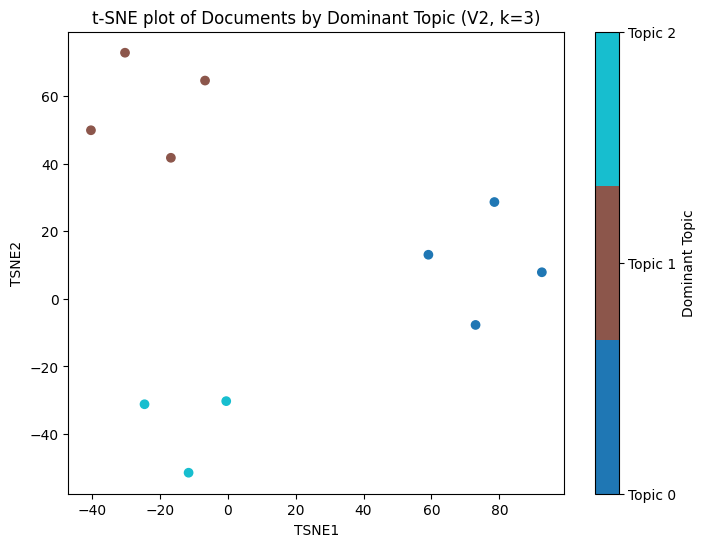

In [25]:
import matplotlib.colors as mcolors

# Define a discrete colormap with exactly 3 distinct colors
cmap = plt.get_cmap('tab10', 3)  # tab10 has 10 distinct colors, we pick 3

plt.figure(figsize=(8,6))
scatter = plt.scatter(df_vis_3['TSNE1'], df_vis_3['TSNE2'], c=df_vis_3['Dominant_Topic'], cmap=cmap)
cbar = plt.colorbar(scatter, ticks=[0,1,2])
cbar.set_label('Dominant Topic')
cbar.set_ticks([0,1,2])
cbar.set_ticklabels(['Topic 0', 'Topic 1', 'Topic 2'])  # Optional: more descriptive

plt.title('t-SNE plot of Documents by Dominant Topic (V2, k=3)')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()


# Step 6 - Unsupervised Document Clustering with K-Means

In addition to LDA topic modeling, we apply K-Means clustering directly on document representations to compare clustering results.

For each preprocessing version (V1 - lemmatized tokens and V2 - bigrams), we use the document-topic distributions generated by the best LDA model as input features for K-Means clustering.

The goal is to see whether K-Means groups documents in a way that corresponds to the known categories (EEG, motors, PLN) and to compare results between the two preprocessing versions.

We will evaluate cluster quality using:
- Visualizations (2D projections)
- Confusion matrix comparing clusters vs original document labels
- Cluster composition analysis



     Document  Original_Label  V1_KMeans_Cluster  V2_KMeans_Cluster
0   EEG01.pdf               0                  2                  2
1   EEG02.pdf               0                  1                  2
2   EEG03.pdf               0                  1                  0
3   EEG04.pdf               0                  2                  2
4   MOT01.pdf               1                  0                  0
5   MOT02.pdf               1                  2                  0
6   MOT03.pdf               1                  0                  0
7   NLP01.pdf               2                  1                  1
8   NLP02.pdf               2                  2                  0
9   NLP03.pdf               2                  2                  1
10  NLP04.pdf               2                  2                  1


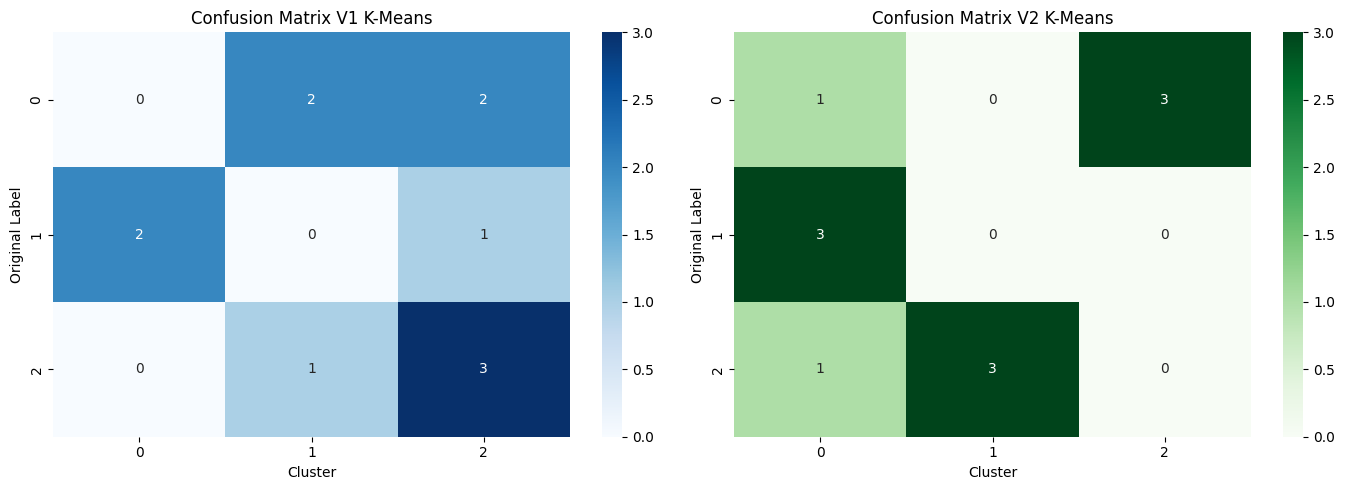

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Function to extract document-topic distributions from LDA model
def get_doc_topic_distributions(lda_model, corpus, num_topics):
    doc_topic_dist = []
    for bow in corpus:
        topic_probs = lda_model.get_document_topics(bow, minimum_probability=0)
        probs = [prob for _, prob in sorted(topic_probs, key=lambda x: x[0])]
        doc_topic_dist.append(probs)
    return np.array(doc_topic_dist)

# Get document-topic distributions for V1 and V2 best LDA models (k=3)
doc_topics_v1 = get_doc_topic_distributions(best_model_v1, corpus_v1, best_k_v1)
doc_topics_v2 = get_doc_topic_distributions(best_model_v2, corpus_v2, best_k_v2)

# Apply K-Means clustering with 3 clusters
kmeans_v1 = KMeans(n_clusters=3, random_state=42).fit(doc_topics_v1)
kmeans_v2 = KMeans(n_clusters=3, random_state=42).fit(doc_topics_v2)

doc_names = ["EEG01.pdf", "EEG02.pdf", "EEG03.pdf", "EEG04.pdf", "MOT01.pdf", "MOT02.pdf", "MOT03.pdf", "NLP01.pdf", "NLP02.pdf", "NLP03.pdf", "NLP04.pdf"]

# Map documents to labels (3 classes : EEG, MOT, NLP)
label_map = {
    "EEG01.pdf": 0, "EEG02.pdf": 0, "EEG03.pdf": 0, "EEG04.pdf": 0,
    "MOT01.pdf": 1, "MOT02.pdf": 1, "MOT03.pdf": 1,
    "NLP01.pdf": 2, "NLP02.pdf": 2, "NLP03.pdf": 2, "NLP04.pdf": 2
}

# Prepare DataFrame
df_clusters = pd.DataFrame({
    'Document': [doc_id for doc_id, _ in lemmatized_docs],
    'Original_Label': [label_map[doc] for doc in doc_names],
    'V1_KMeans_Cluster': kmeans_v1.labels_,
    'V2_KMeans_Cluster': kmeans_v2.labels_,
})

print(df_clusters)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

cm_v1 = confusion_matrix(df_clusters['Original_Label'], df_clusters['V1_KMeans_Cluster'])
sns.heatmap(cm_v1, annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('Confusion Matrix V1 K-Means')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Original Label')

cm_v2 = confusion_matrix(df_clusters['Original_Label'], df_clusters['V2_KMeans_Cluster'])
sns.heatmap(cm_v2, annot=True, fmt='d', ax=axes[1], cmap='Greens')
axes[1].set_title('Confusion Matrix V2 K-Means')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Original Label')

plt.tight_layout()
plt.show()


### K-Means Analysis V1 vs V2

Clusters are compared to original labels (0=EEG, 1=Motors, 2=NLP).

- **V1:**  
  - EEG scattered between clusters 1 and 2.  
  - Motors split between clusters 0 and 2.  
  - NLP mostly in cluster 2.

- **V2:**  
  - Motors well grouped in cluster 0.  
  - EEG mainly in clusters 0 and 2.  
  - NLP somewhat spread across clusters 0 and 1.

**Conclusion:** V2 shows better overall coherence, especially for motors, but some mixing remains. Bigram preprocessing outperforms simple lemmatization.


# Step 7 - Comparison between Topic Modeling (LDA) and K-Means Clustering

This section compares two unsupervised approaches for document classification applied to two text preprocessing versions (V1: lemmatized texts, V2: bigrams):

- **Topic Modeling (LDA):** Assigns each document a dominant topic based on topic probability distributions.
- **K-Means Clustering:** Groups documents based on their topic distribution vectors obtained from LDA models.

---

## Topics Extracted by LDA (k=3)

### V1 Topics:
- **Topic 0:** disease, patient, eeg, sleep, parkinson, motor, testing, brain...
- **Topic 1:** extraction, business, language, rule, step, verb, natural, learning...
- **Topic 2:** fuel, engine, diesel, emission, combustion, oil, ppm, additive...

### V2 Topics:
- **Topic 0:** patient, parkinson_disease, eeg, disease, network, clinical, brain...
- **Topic 1:** text, step, word, algorithm, example, natural_language, paragraph...
- **Topic 2:** fuel, engine, emission, diesel, nanoparticle, combustion, gasoline...

---

## Document Topic Assignments (LDA Dominant Topic vs. Original Labels)

| Document  | Original Label | V1 Dominant Topic | V2 Dominant Topic |
|-----------|----------------|-------------------|-------------------|
| EEG01.pdf | EEG (0)        | 0                 | 0                 |
| EEG02.pdf | EEG (0)        | 0                 | 0                 |
| EEG03.pdf | EEG (0)        | 0                 | 0                 |
| EEG04.pdf | EEG (0)        | 0                 | 0                 |
| MOT01.pdf | Motors (1)     | 2                 | 2                 |
| MOT02.pdf | Motors (1)     | 2                 | 2                 |
| MOT03.pdf | Motors (1)     | 2                 | 2                 |
| NLP01.pdf | NLP (2)        | 1                 | 1                 |
| NLP02.pdf | NLP (2)        | 0                 | 1                 |
| NLP03.pdf | NLP (2)        | 1                 | 1                 |
| NLP04.pdf | NLP (2)        | 1                 | 1                 |

- LDA topics largely correspond to the original labels.
- Some mixing occurs (e.g., NLP02.pdf in V1 assigned to topic 0 instead of NLP topic 1).

---

## Document Clusters from K-Means on Topic Distributions

| Document  | Original Label | V1 K-Means Cluster | V2 K-Means Cluster |
|-----------|----------------|--------------------|--------------------|
| EEG01.pdf | 0              | 2                  | 2                  |
| EEG02.pdf | 0              | 1                  | 2                  |
| EEG03.pdf | 0              | 1                  | 0                  |
| EEG04.pdf | 0              | 2                  | 2                  |
| MOT01.pdf | 1              | 0                  | 0                  |
| MOT02.pdf | 1              | 2                  | 0                  |
| MOT03.pdf | 1              | 0                  | 0                  |
| NLP01.pdf | 2              | 1                  | 1                  |
| NLP02.pdf | 2              | 2                  | 0                  |
| NLP03.pdf | 2              | 2                  | 1                  |
| NLP04.pdf | 2              | 2                  | 1                  |

- K-Means clusters differ slightly from LDA dominant topic assignments.
- V2 clusters appear more consistent with original labels than V1.
- Some documents are clustered differently, showing the effect of preprocessing and clustering.

---

## Analysis and Comparison

- **LDA provides interpretable topics** by listing top words per theme, allowing qualitative analysis of document groups.
- **K-Means creates sharper clusters** on LDA topic distributions, useful for hard classification.
- **V2 preprocessing (bigrams) improves cluster coherence** and aligns better with original labels in both LDA and K-Means.
- The small dataset size may cause some misclassifications or overlaps.
- Combining LDA and K-Means can yield a robust unsupervised classification pipeline: 
  - LDA extracts semantic topics,
  - K-Means groups documents based on these semantic features.

---

## Conclusion

Both methods have strengths:
- Use **LDA for exploration and understanding topics** within the corpus.
- Use **K-Means for strict clustering** once topic distributions are computed.

In this task, preprocessing impacts results significantly, with bigrams (V2) providing better alignment with original document categories.

---

